In [1]:
#数据加载与处理
import metaknowledge as mk
import pandas as pd

#统计图表绘制
import matplotlib.pyplot as plt
import seaborn as sns

#图形内嵌到Notebook中
%matplotlib inline

#图表样式主题
sns.set_style(style="white") # 改变绘制的背景颜色
sns.set(font_scale=.75)      # 设置字体大小
plt.rc("savefig", dpi=400)   # 修改生成图像的画质

#交互式图表绘制
import chart_studio.plotly as py
import plotly.graph_objs as go


#英文为罗马字体并显示负号，图形分辨率为200
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.dpi'] = 200

In [2]:
RC = mk.RecordCollection(r'D:\python科学计量可视化\数据\Demo data\Python-Wos',cached=True)
type(RC.glimpse())

str

In [3]:
print(RC.glimpse())

RecordCollection glimpse made at: 2022-05-18 12:11:25
6358 Records from files-from-D:\python科学计量可视化\数据

Top Authors
1 Bornmann, Lutz
2 Leydesdorff, Loet
3 Thelwall, Mike
4 Abramo, Giovanni
4 D'Angelo, Ciriaco Andrea
5 Rousseau, Ronald
6 Ding, Ying
7 Glanzel, Wolfgang
8 Huang, Mu-Hsuan
9 Lariviere, Vincent
10 Prathap, Gangan
11 Yan, Erjia

Top Journals
1 SCIENTOMETRICS
2 JOURNAL OF THE ASSOCIATION FOR INFORMATION SCIENCE AND TECHNOLOGY
3 JOURNAL OF INFORMETRICS
4 JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY

Top Cited
1 Hirsch JE, 2005, P NATL ACAD SCI USA, V102, P16569, DOI 10.1073/pnas.0507655102
2 Egghe L, 2006, SCIENTOMETRICS, V69, P131, DOI 10.1007/s11192-006-0144-7
3 Waltman L, 2012, J AM SOC INF SCI TEC, V63, P406, DOI 10.1002/asi.21678
4 Leydesdorff L, 2011, J AM SOC INF SCI TEC, V62, P217, DOI 10.1002/asi.21450
5 Katz JS, 1997, RES POLICY, V26, P1, DOI 10.1016/S0048-7333(96)00917-1
6 Leydesdorff L, 2009, J AM SOC INF SCI TEC, V60, P348, DOI 10.1002/asi

In [4]:
print(RC.tags())

{'PI', 'DE', 'HO', 'FX', 'VL', 'CR', 'OI', 'AR', 'TI', 'SP', 'EA', 'AB', 'OA', 'JI', 'C1', 'BP', 'HP', 'WC', 'FU', 'PA', 'DI', 'UT', 'SO', 'DT', 'SI', 'EM', 'PG', 'ID', 'SN', 'PD', 'Z9', 'U1', 'AF', 'PU', 'EP', 'NR', 'U2', 'LA', 'CY', 'J9', 'IS', 'AU', 'CL', 'EI', 'HC', 'PM', 'RP', 'SC', 'DA', 'TC', 'PY', 'GA', 'PT', 'CT', 'RI'}


In [5]:
print(RC.glimpse('OA'))

RecordCollection glimpse made at: 2022-05-18 12:11:25
6358 Records from files-from-D:\python科学计量可视化\数据

OA
1 Green Submitted
2 Green Published
3 Green Accepted
4 Green Published, hybrid
5 hybrid
6 hybrid, Green Published
7 Bronze
8 Green Submitted, Green Accepted
9 Green Accepted, Green Submitted
10 Green Submitted, Green Published
11 Green Published, Green Submitted
12 Green Submitted, Bronze


In [6]:
print(RC.glimpse('AF','AU'))

RecordCollection glimpse made at: 2022-05-18 12:11:25
6358 Records from files-from-D:\python科学计量可视化\数据

AF
1 Bornmann, Lutz
2 Leydesdorff, Loet
3 Thelwall, Mike
4 Abramo, Giovanni
4 D'Angelo, Ciriaco Andrea
5 Rousseau, Ronald
6 Ding, Ying
7 Glanzel, Wolfgang
8 Huang, Mu-Hsuan
9 Lariviere, Vincent
10 Prathap, Gangan
11 Yan, Erjia

AU
1 Bornmann, L
2 Leydesdorff, L
3 Thelwall, M
4 Abramo, G
5 D'Angelo, CA
6 Rousseau, R
7 Glanzel, W
8 Ding, Y
9 Huang, MH
10 Prathap, G
10 Lariviere, V
11 Sugimoto, CR


In [7]:
df = pd.DataFrame(RC.makeDict())
df.head()

,PT,AU,AF,TI,SO,LA,DT,DE,ID,AB,...,HP,CT,CY,CL,SP,HO,num-Authors,num-Male,num-Female,num-Unknown
0,J,"[Wang, CC, Ho, YS]","[Wang, Chong-Chen, Ho, Yuh-Shan]",Research trend of metal-organic frameworks: a ...,SCIENTOMETRICS,English,Article,"[web of science, sci-expanded, scientometrics,...","[SCIENCE-CITATION-INDEX, HIGHLY CITED ARTICLES...",A bibliometric analysis based on the related a...,...,None,None,None,None,None,None,2,0,0,2
1,J,"[McCain, KW]","[McCain, Katherine W.]",Mining full-text journal articles to assess ob...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,English,Article,"[citation analysis, authorship, contextual inf...","[CITATION ANALYSIS, INTELLECTUAL INFLUENCE, CU...",This study explores the usefulness of full-tex...,...,None,None,None,None,None,None,1,0,1,0
2,J,"[Bensman, SJ]","[Bensman, Stephen J.]",The impact factor: its place in Garfield's tho...,SCIENTOMETRICS,English,Article,"[impact factor, citation analysis, science eva...","[SCIENTIFIC JOURNALS, MARKET]","This paper is a response to that of Vanclay, w...",...,None,None,None,None,None,None,1,1,0,0
3,J,"[Rousseau, R, Guns, R, Rahman, AIMJ, Engels, TCE]","[Rousseau, Ronald, Guns, Raf, Rahman, A. I. M....",Measuring cognitive distance between publicati...,JOURNAL OF INFORMETRICS,English,Article,"[cognitive distances, barycenters, similarity ...",[CATEGORIES],We study the problem of determining the cognit...,...,None,None,None,None,None,None,4,2,0,2
4,J,"[Abbas, J]","[Abbas, June]",Discover Digital Libraries: Theory and Practice,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,English,Book Review,None,None,None,...,None,None,None,None,None,None,1,0,1,0


In [8]:
print(df.columns)

Index(['PT', 'AU', 'AF', 'TI', 'SO', 'LA', 'DT', 'DE', 'ID', 'AB', 'C1', 'RP',
       'EM', 'RI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU', 'PI',
       'PA', 'SN', 'EI', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'BP', 'EP', 'DI',
       'PG', 'WC', 'SC', 'GA', 'UT', 'DA', 'SI', 'OI', 'OA', 'PM', 'EA', 'AR',
       'HC', 'HP', 'CT', 'CY', 'CL', 'SP', 'HO', 'num-Authors', 'num-Male',
       'num-Female', 'num-Unknown'],
      dtype='object')


In [9]:
list(set(df.columns) - RC.tags())

['num-Female', 'num-Male', 'num-Authors', 'num-Unknown']

In [10]:
df['SO'].value_counts()

SCIENTOMETRICS                                                            3480
JOURNAL OF THE ASSOCIATION FOR INFORMATION SCIENCE AND TECHNOLOGY         1340
JOURNAL OF INFORMETRICS                                                    891
JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY     647
Name: SO, dtype: int64

In [11]:
df['SO'].value_counts(ascending=True)

JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY     647
JOURNAL OF INFORMETRICS                                                    891
JOURNAL OF THE ASSOCIATION FOR INFORMATION SCIENCE AND TECHNOLOGY         1340
SCIENTOMETRICS                                                            3480
Name: SO, dtype: int64

In [12]:
#英文为罗马字体并显示负号，图形分辨率为200
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.dpi'] = 200

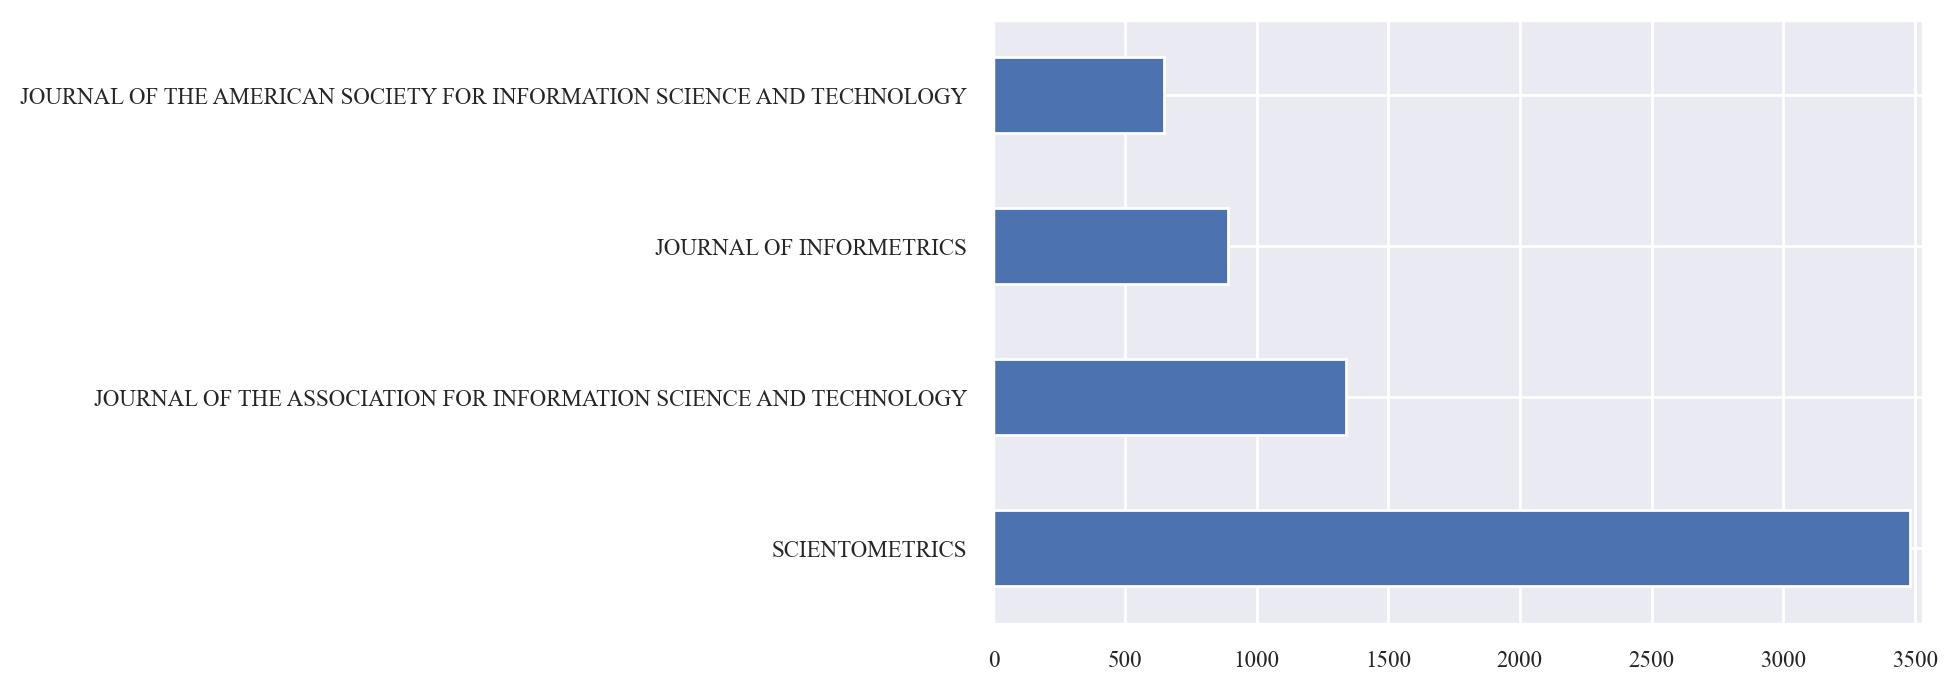

In [13]:
df['SO'].value_counts().plot(kind='barh')

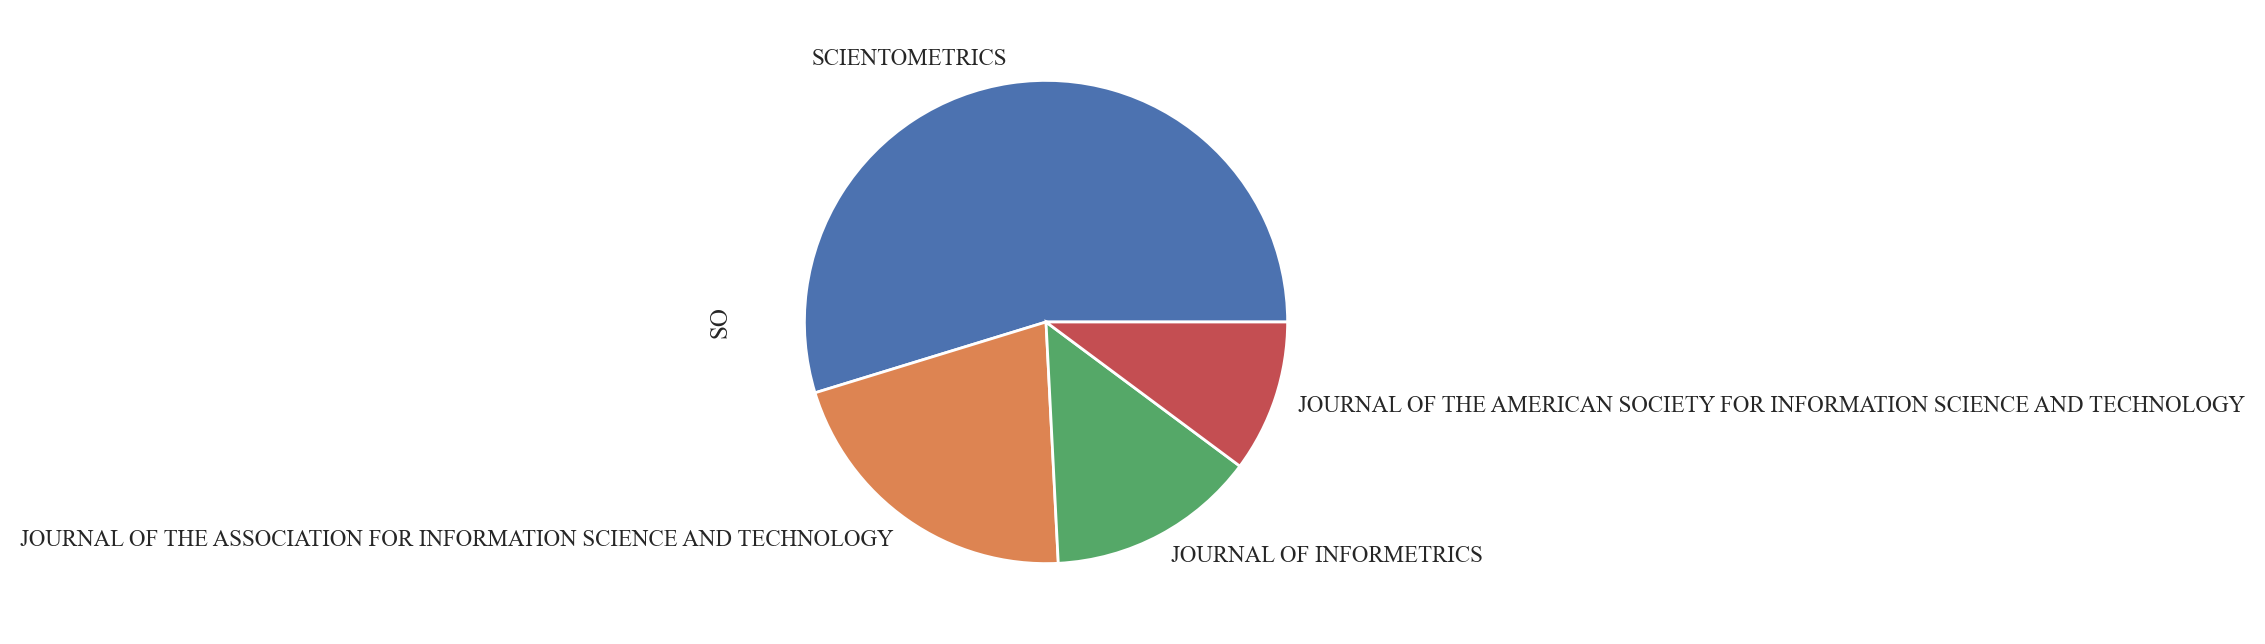

In [14]:
df['SO'].value_counts().plot(kind='pie')

(-1.25, 1.25, -1.25, 1.25)

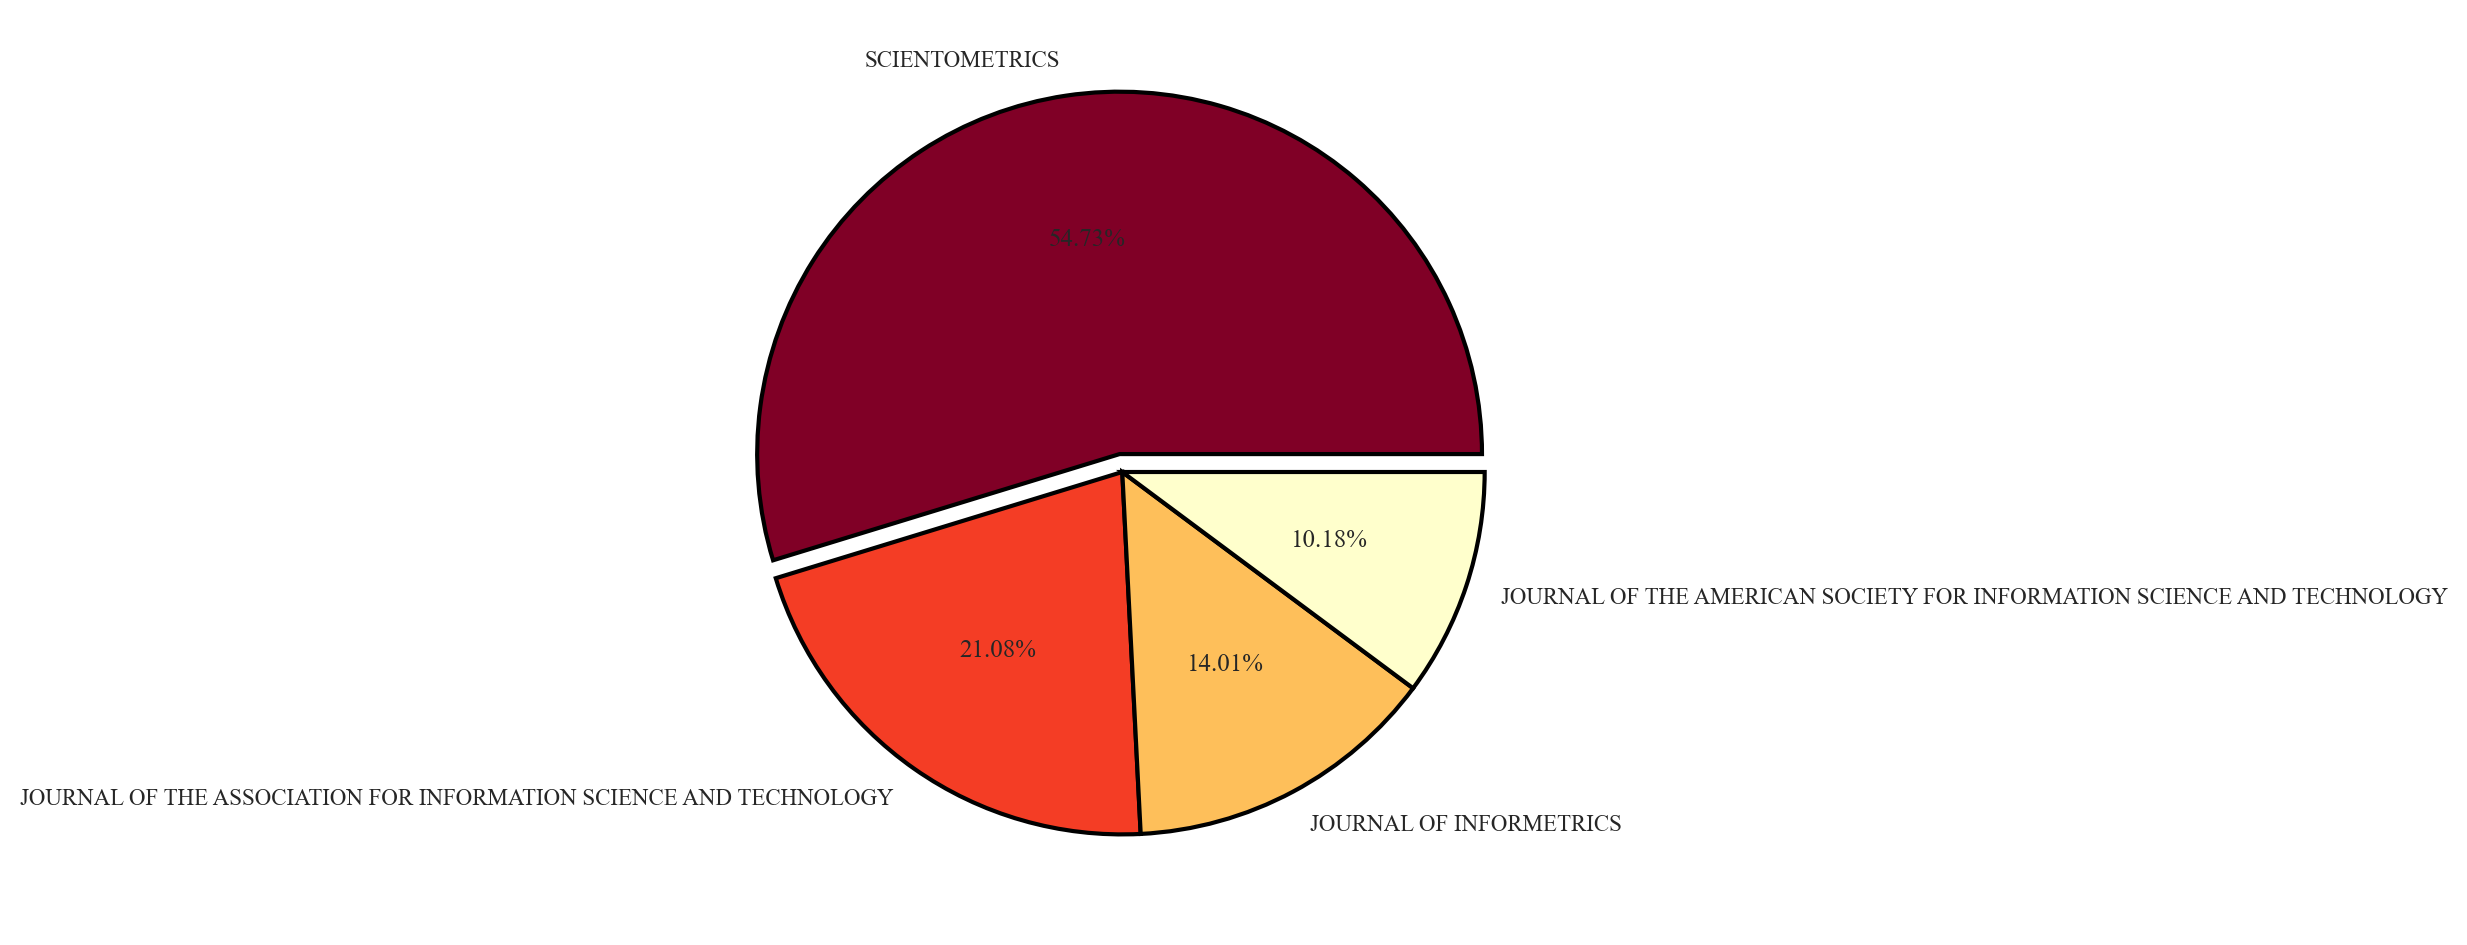

In [15]:
df['SO'].value_counts().plot(kind='pie',autopct='%.2f%%',subplots=True,cmap='YlOrRd_r',label = True,
                                wedgeprops={'linewidth': 1.5, 'edgecolor': "black"},
                                figsize=(10,6),
                               explode = [0.05,0,0,0])

plt.axis('off')

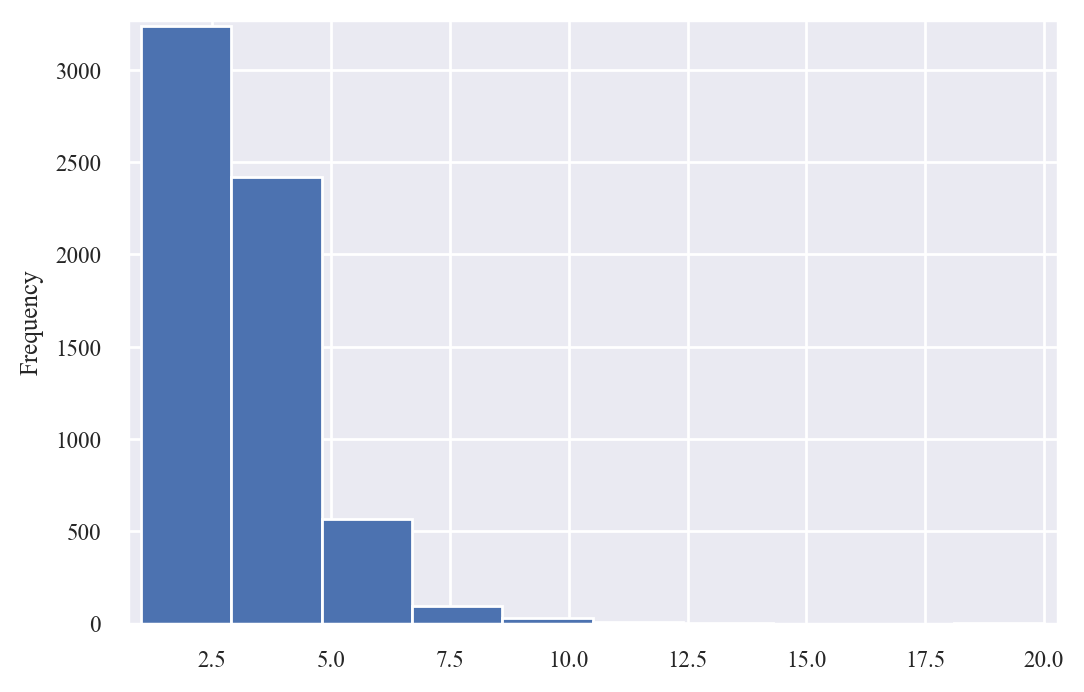

In [16]:
df['num-Authors'].plot(kind='hist')

In [17]:
print('统计文献中单篇文章的作者数量范围是：',(df['num-Authors'].min(),df['num-Authors'].max()))

统计文献中单篇文章的作者数量范围是： (1, 20)


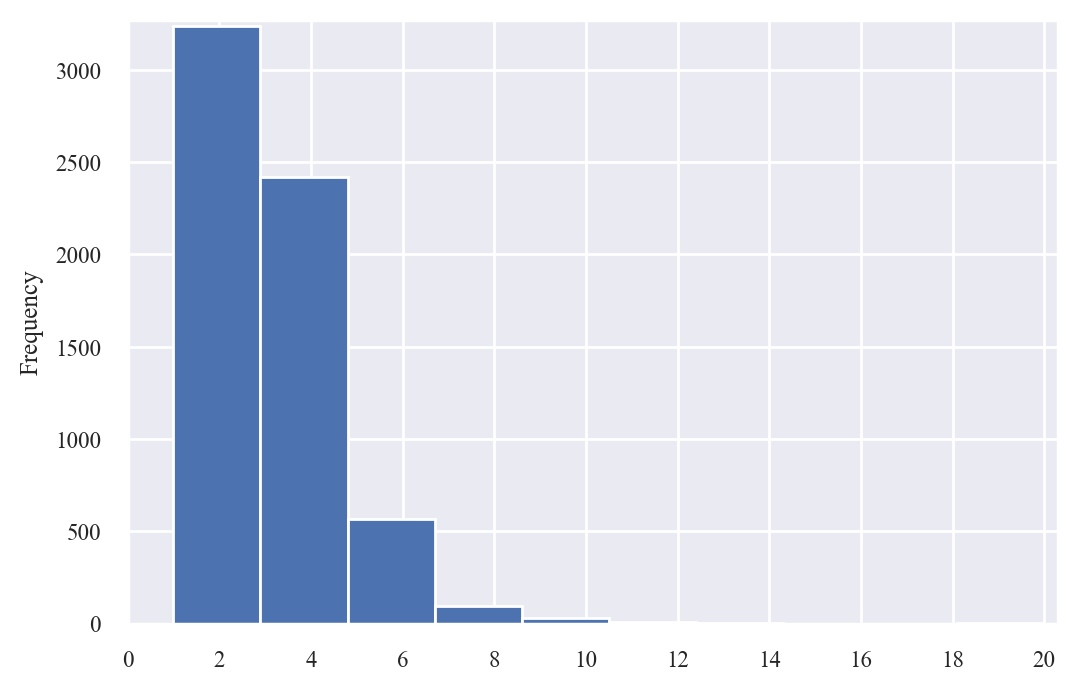

In [18]:
df['num-Authors'].plot(kind='hist',xticks=list(range(0,22,2)))

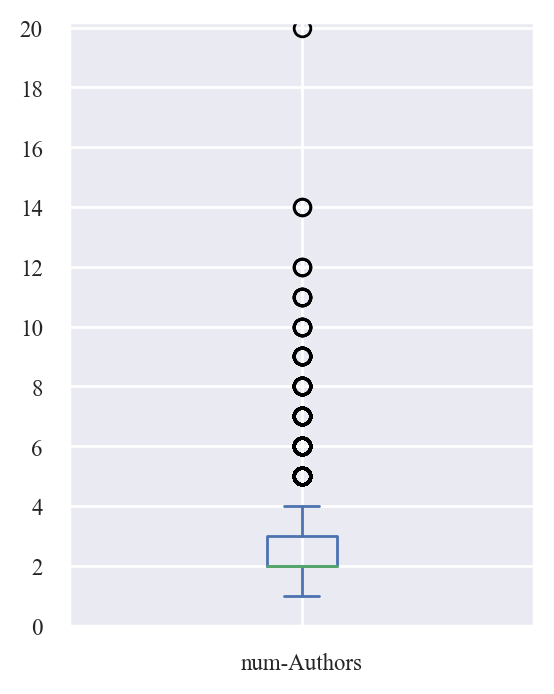

In [19]:
df['num-Authors'].plot(kind='box',figsize=(3,4),yticks=list(range(0,22,2)))

In [20]:
df['AF']

0                        [Wang, Chong-Chen, Ho, Yuh-Shan]
1                                  [McCain, Katherine W.]
2                                   [Bensman, Stephen J.]
3       [Rousseau, Ronald, Guns, Raf, Rahman, A. I. M....
4                                           [Abbas, June]
                              ...                        
6353    [Cugmas, Marjan, Ferligoj, Anuska, Kronegger, ...
6354          [Kang, Lele, Tan, Chuan-Hoo, Zhao, J. Leon]
6355                                           [Sun, Jun]
6356    [Jeong, Seongkyoon, Choi, Jae Young, Kim, Jaeyun]
6357    [Bu, Yi, Wang, Binglu, Huang, Win-bin, Che, Sh...
Name: AF, Length: 6358, dtype: object

In [21]:
def multi_element_count(df_tag):
    ls = []
    for i in df_tag:
        if i:
            ls.extend(i)

    return pd.Series(ls).value_counts()

In [22]:
multi_element_count(df['AF'])

Bornmann, Lutz              190
Leydesdorff, Loet           128
Thelwall, Mike              123
Abramo, Giovanni             86
D'Angelo, Ciriaco Andrea     86
                           ... 
Vaccari, Alessio              1
Chan, Ho F.                   1
Comin, Cesar H.               1
de Arruda, Henrique F.        1
Che, Shangkun                 1
Length: 9464, dtype: int64

In [23]:
multi_element_count(df['AF']).head(15)

Bornmann, Lutz              190
Leydesdorff, Loet           128
Thelwall, Mike              123
Abramo, Giovanni             86
D'Angelo, Ciriaco Andrea     86
Rousseau, Ronald             84
Ding, Ying                   61
Glanzel, Wolfgang            56
Huang, Mu-Hsuan              48
Lariviere, Vincent           47
Prathap, Gangan              46
Yan, Erjia                   45
Sugimoto, Cassidy R.         42
Haunschild, Robin            39
Song, Min                    37
dtype: int64

In [24]:
print(RC.glimpse('AF'))

RecordCollection glimpse made at: 2022-05-18 12:11:28
6358 Records from files-from-D:\python科学计量可视化\数据

AF
1 Bornmann, Lutz
2 Leydesdorff, Loet
3 Thelwall, Mike
4 Abramo, Giovanni
4 D'Angelo, Ciriaco Andrea
5 Rousseau, Ronald
6 Ding, Ying
7 Glanzel, Wolfgang
8 Huang, Mu-Hsuan
9 Lariviere, Vincent
10 Prathap, Gangan
11 Yan, Erjia


In [25]:
multi_element_count(df['DE'])

bibliometrics               593
citation analysis           349
scientometrics              202
h-index                     174
citations                   169
                           ... 
scientific dimensions         1
agroenergy                    1
hirsch-type index             1
hiring                        1
multinomial probit model      1
Length: 9889, dtype: int64

In [26]:
multi_element_count(df['ID'])

SCIENCE                     1227
IMPACT                       882
INDICATORS                   379
PATTERNS                     341
JOURNALS                     338
                            ... 
SPEECH-COMMUNICATION           1
CANADA                         1
MIDDLE-PLEISTOCENE             1
SCIENCE PUBLICATIONS           1
MULTINOMIAL PROBIT MODEL       1
Length: 4907, dtype: int64

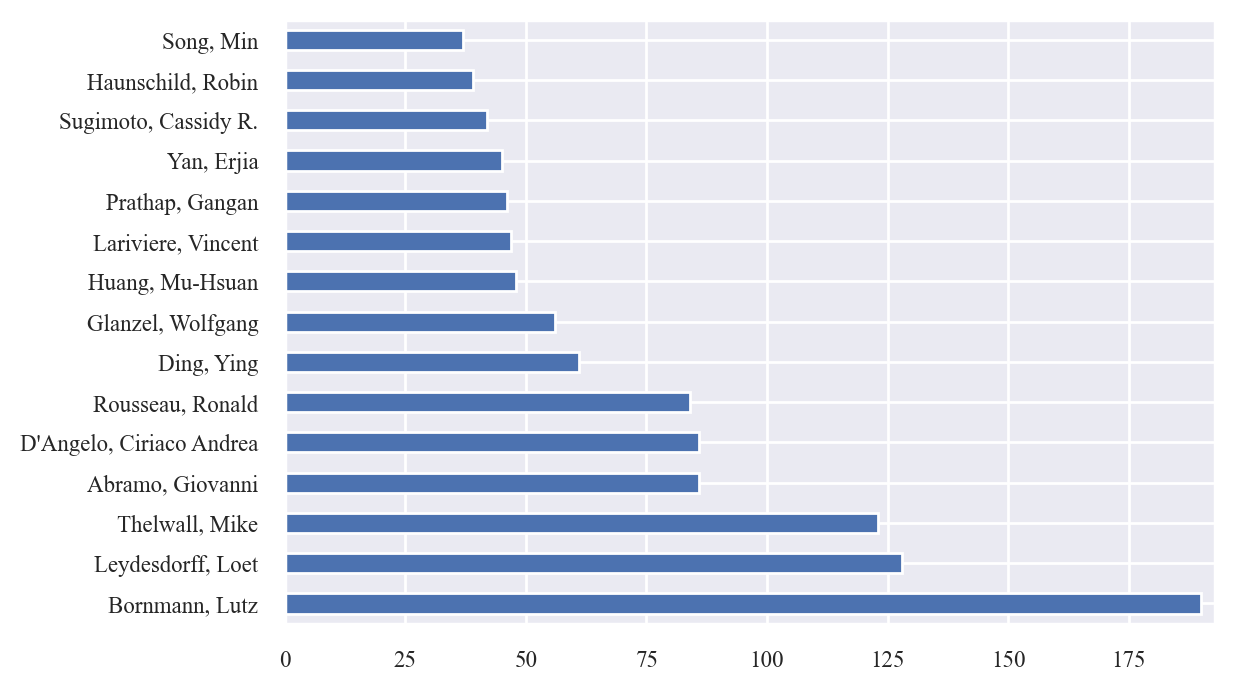

In [27]:
multi_element_count(df['AF']).head(15).plot(kind='barh')